In [1]:
with open('./function/requirements_import.py') as f:
    exec(f.read())
    
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
class_weights = {0: 0.12, 1: 6.3, 2: 3.99, 3: 4.63, 4: 4.28, 5: 3.43, 6: 5.15, 7: 6.85, 8: 17.79, 9: 20.86}

es = EarlyStopping(monitor='val_loss',        # 얼리스토핑을 적용할 관측 지표
                min_delta=0,               # 임계값
                patience=5,                # 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                verbose=0,                 # 몇 번째 epochs에서 얼리스토핑이 되었는가 알려줌
                restore_best_weights=True  # 최적의 가중치를 가진 epoch 시점으로 가중치를 되돌림
                )

# Data Load

In [41]:
rainfall2.columns

Index(['ef_hour', 'v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08',
       'v09', 'class_interval', 'quarter', 'ef_day_y', 'fc_day_y', 'rng_v01',
       'rng_v02', 'rng_v03', 'rng_v04', 'rng_v05', 'rng_v06', 'rng_v07',
       'rng_v08', 'rng_v09'],
      dtype='object')

In [42]:
file_path = './data/rainfall_train_v3.csv'
rainfall = pd.read_csv(file_path)
idx = rainfall[rainfall['dh'] == 3].index
idx = idx-1
idx = idx[1:]

#---------------------------------#

rainfall2 = rainfall.drop(columns= list(rainfall.columns[:10]) + list(rainfall.columns[-3:])+ ['fc_year', 'ef_year', 'stn4contest']) #list(rainfall.columns[:10]) + ['fc_day_y']
temp = rainfall2.iloc[idx]
aa = temp.iloc[:int(len(idx) *0.6)].index[-1]
bb = temp.iloc[:int(len(idx) *0.6) + int((len(idx)-int(len(idx) *0.5)) *0.5)].index[-1]

target = 'class_interval'
x = rainfall2.drop(target, axis=1)
y = rainfall2.loc[:, target]

#---------------------------------#

x_train = x.iloc[:aa+1]
y_train = y.iloc[:aa+1]

x_val = x.iloc[aa+1:bb+1]
y_val = y.iloc[aa+1:bb+1]

x_test = x.iloc[bb+1:]
y_test = y.iloc[bb+1:]

# Plot

# GASF

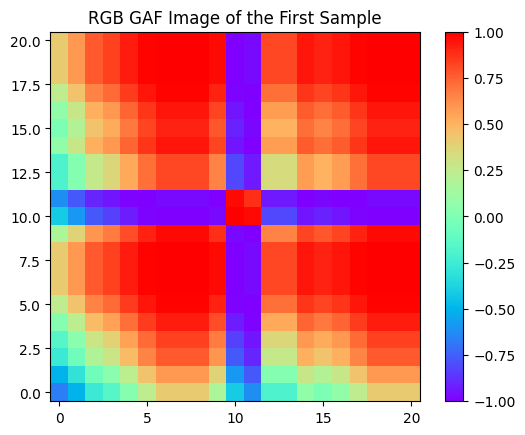

In [45]:
gaf = GramianAngularField(method='summation')
x_test_gaf = gaf.fit_transform(x_test)

plt.imshow(x_test_gaf[11], cmap='rainbow', origin='lower')
plt.title('RGB GAF Image of the First Sample')
plt.colorbar()
plt.show()

In [44]:
categories = list(range(0,10))

gaf = GramianAngularField(method='summation')
x_test_gaf = gaf.fit_transform(x_test)

for category in categories:
    idx = np.where(y_test == category)[0]
    gaf_images = x_test_gaf[idx]
    
    # 평균 계산
    mean_gaf = np.mean(gaf_images, axis=0)
    globals()[f'group{category}'] = np.mean(mean_gaf, axis=1)

# ANOVA 실행
_, p_value = stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9)
print(p_value)

# ANOVA 결과에 따른 Tukey's HSD 실행
data = np.concatenate([group0, group1, group2, group3, group4, group5, group6, group7, group8, group9])
labels = [f'group{i}' for i in categories for _ in range(len(group1))]

tukey_results = pairwise_tukeyhsd(data, labels, 0.05)
result = sum(tukey_results.reject)
        
result

0.4025558056272432


0

In [46]:
categories = list(range(0,10))
statistics = {}

for category in categories:
    idx = np.where(y_test == category)[0]
    gaf_images = x_test_gaf[idx]
    
    # 평균과 표준편차 계산
    mean_gaf = np.mean(gaf_images, axis=0)
    std_gaf = np.std(gaf_images, axis=0)
    
    statistics[category] = (mean_gaf, std_gaf)

# 결과 출력
for category, (mean_gaf, std_gaf) in statistics.items():
    print(f"Category {category} - Mean: {np.mean(mean_gaf):.4f}, Std: {np.mean(std_gaf):.4f}")


Category 0 - Mean: 0.5396, Std: 0.1582
Category 1 - Mean: 0.4125, Std: 0.2057
Category 2 - Mean: 0.4023, Std: 0.2068
Category 3 - Mean: 0.3800, Std: 0.2101
Category 4 - Mean: 0.3680, Std: 0.2216
Category 5 - Mean: 0.3424, Std: 0.2368
Category 6 - Mean: 0.2952, Std: 0.2593
Category 7 - Mean: 0.2876, Std: 0.2733
Category 8 - Mean: 0.2538, Std: 0.2706
Category 9 - Mean: 0.2404, Std: 0.2765


0 ----------------------------------------------------------------------------------------------------


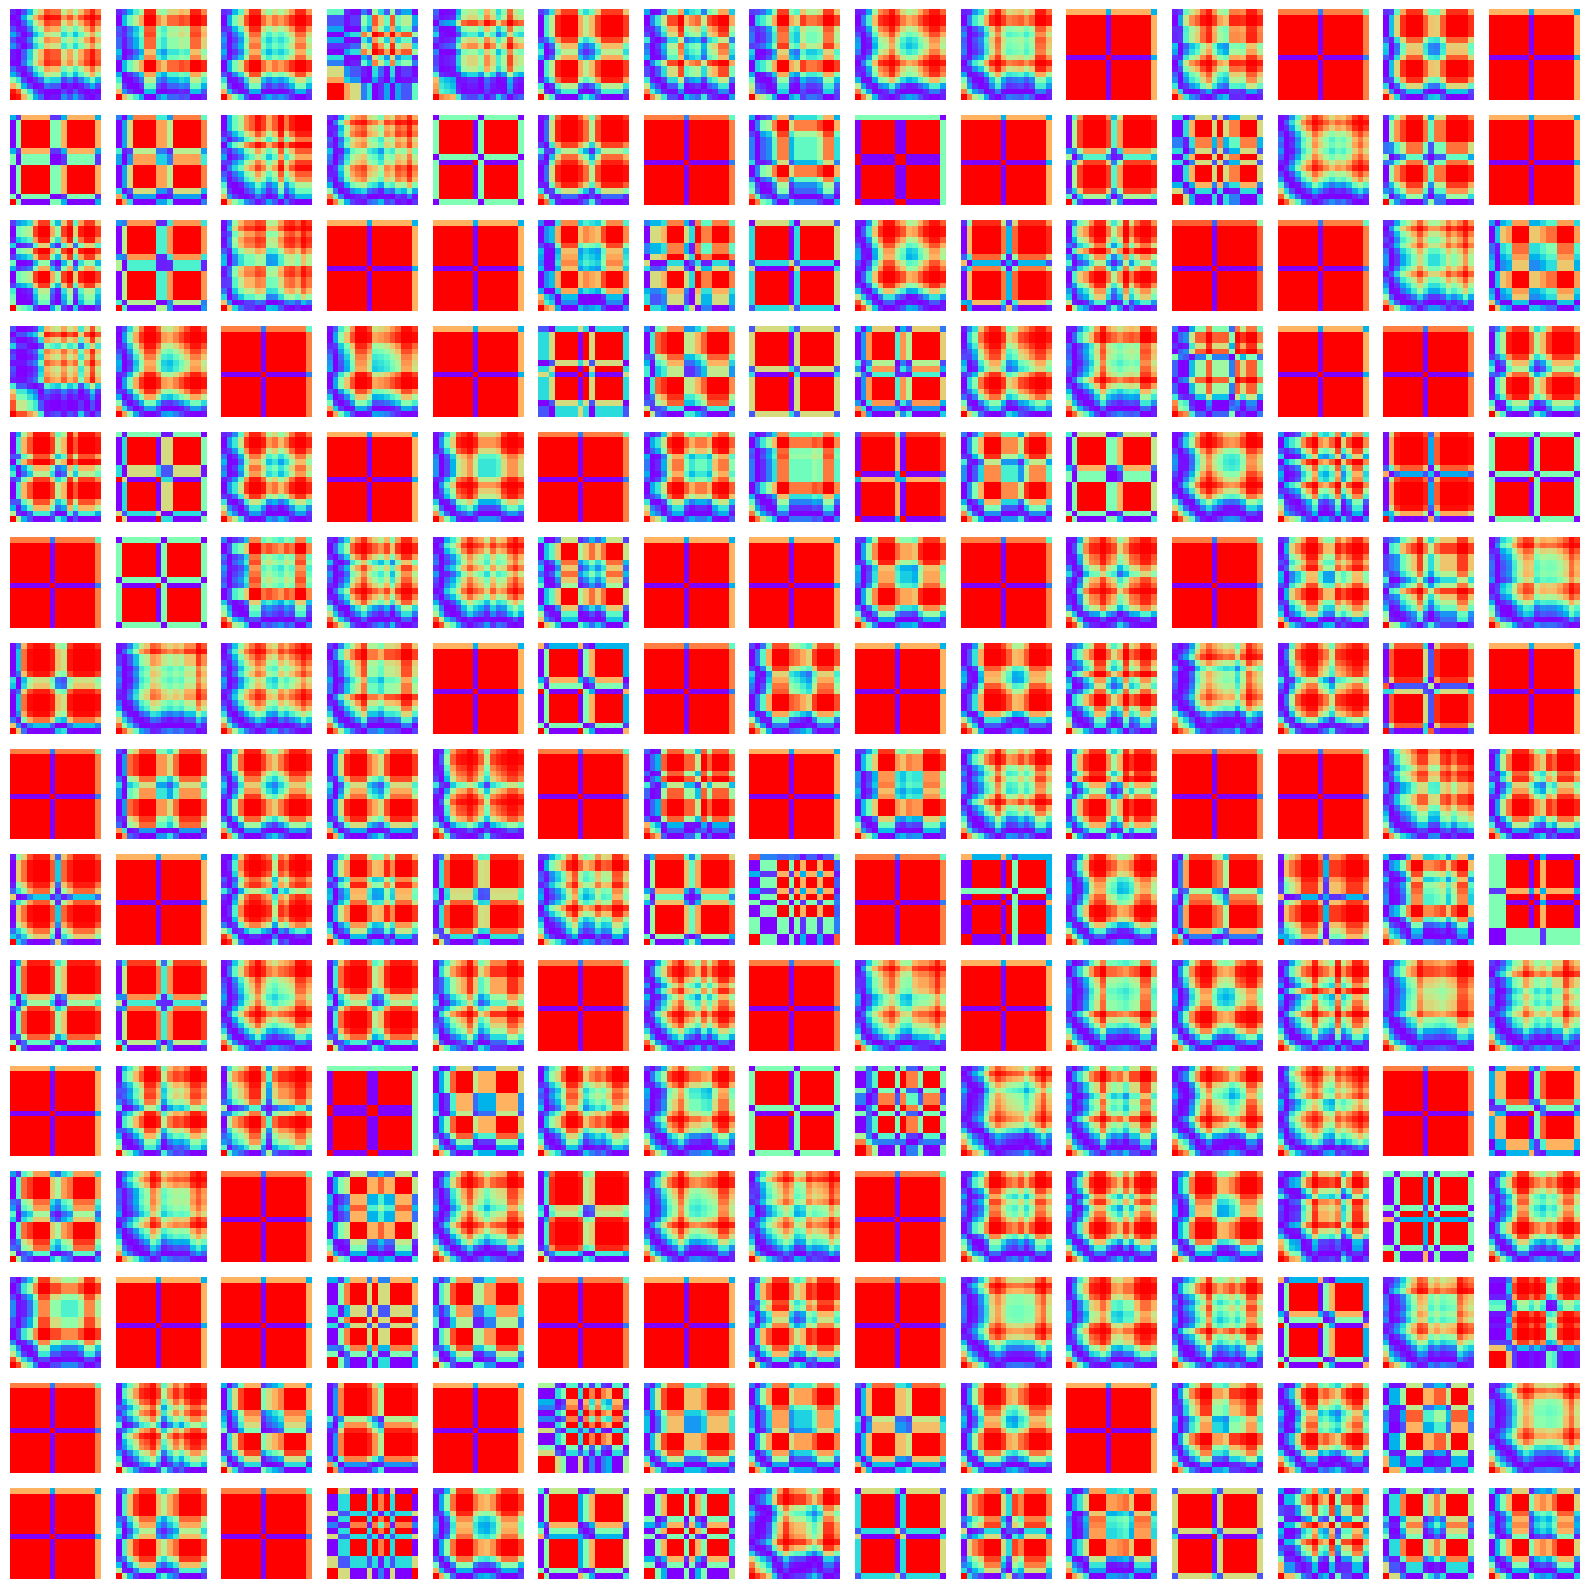

------------------------------------------------------------------------------------------------------
1 ----------------------------------------------------------------------------------------------------


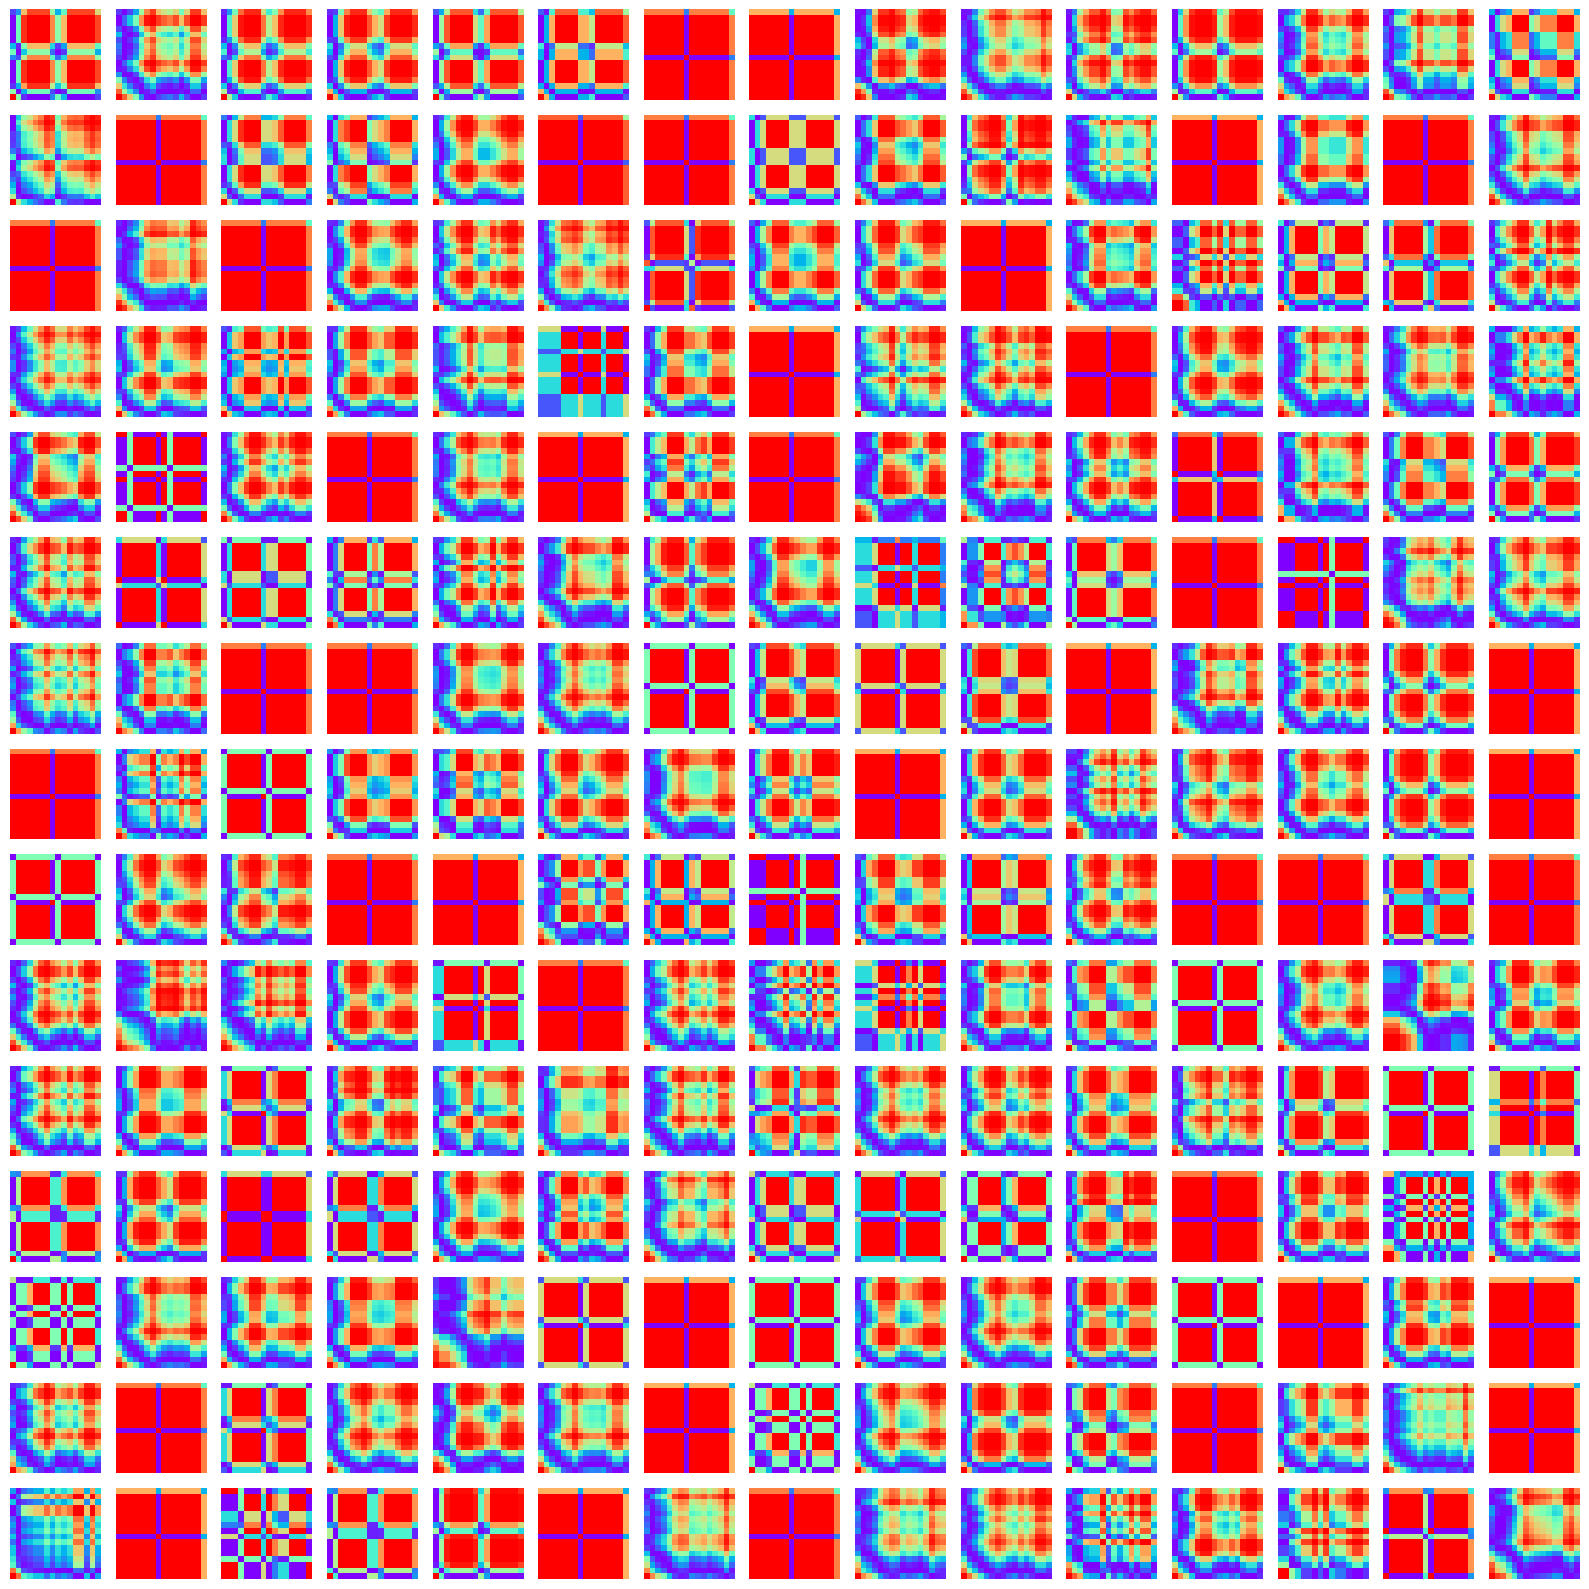

------------------------------------------------------------------------------------------------------
2 ----------------------------------------------------------------------------------------------------


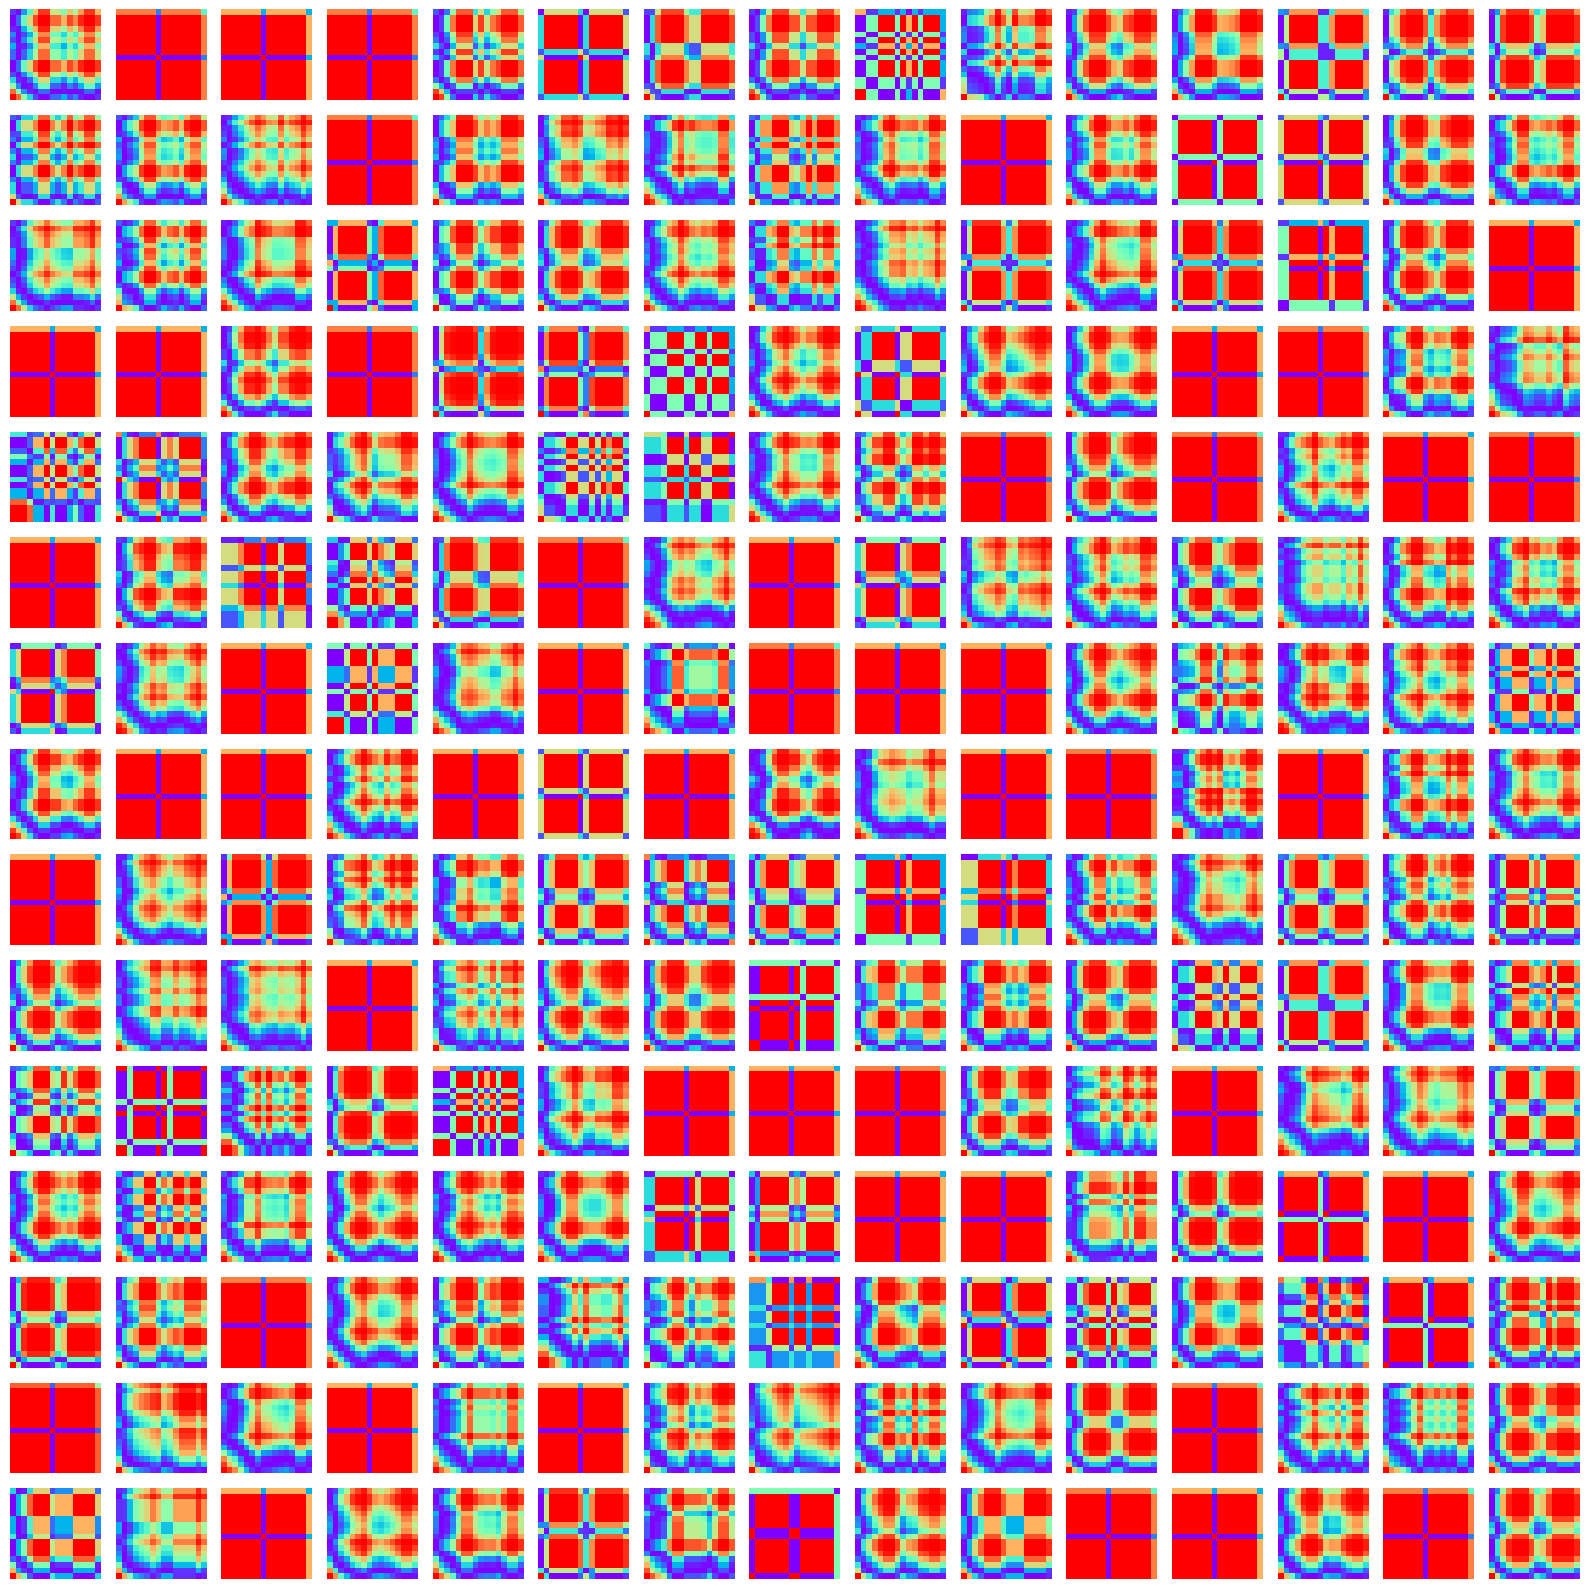

------------------------------------------------------------------------------------------------------
3 ----------------------------------------------------------------------------------------------------


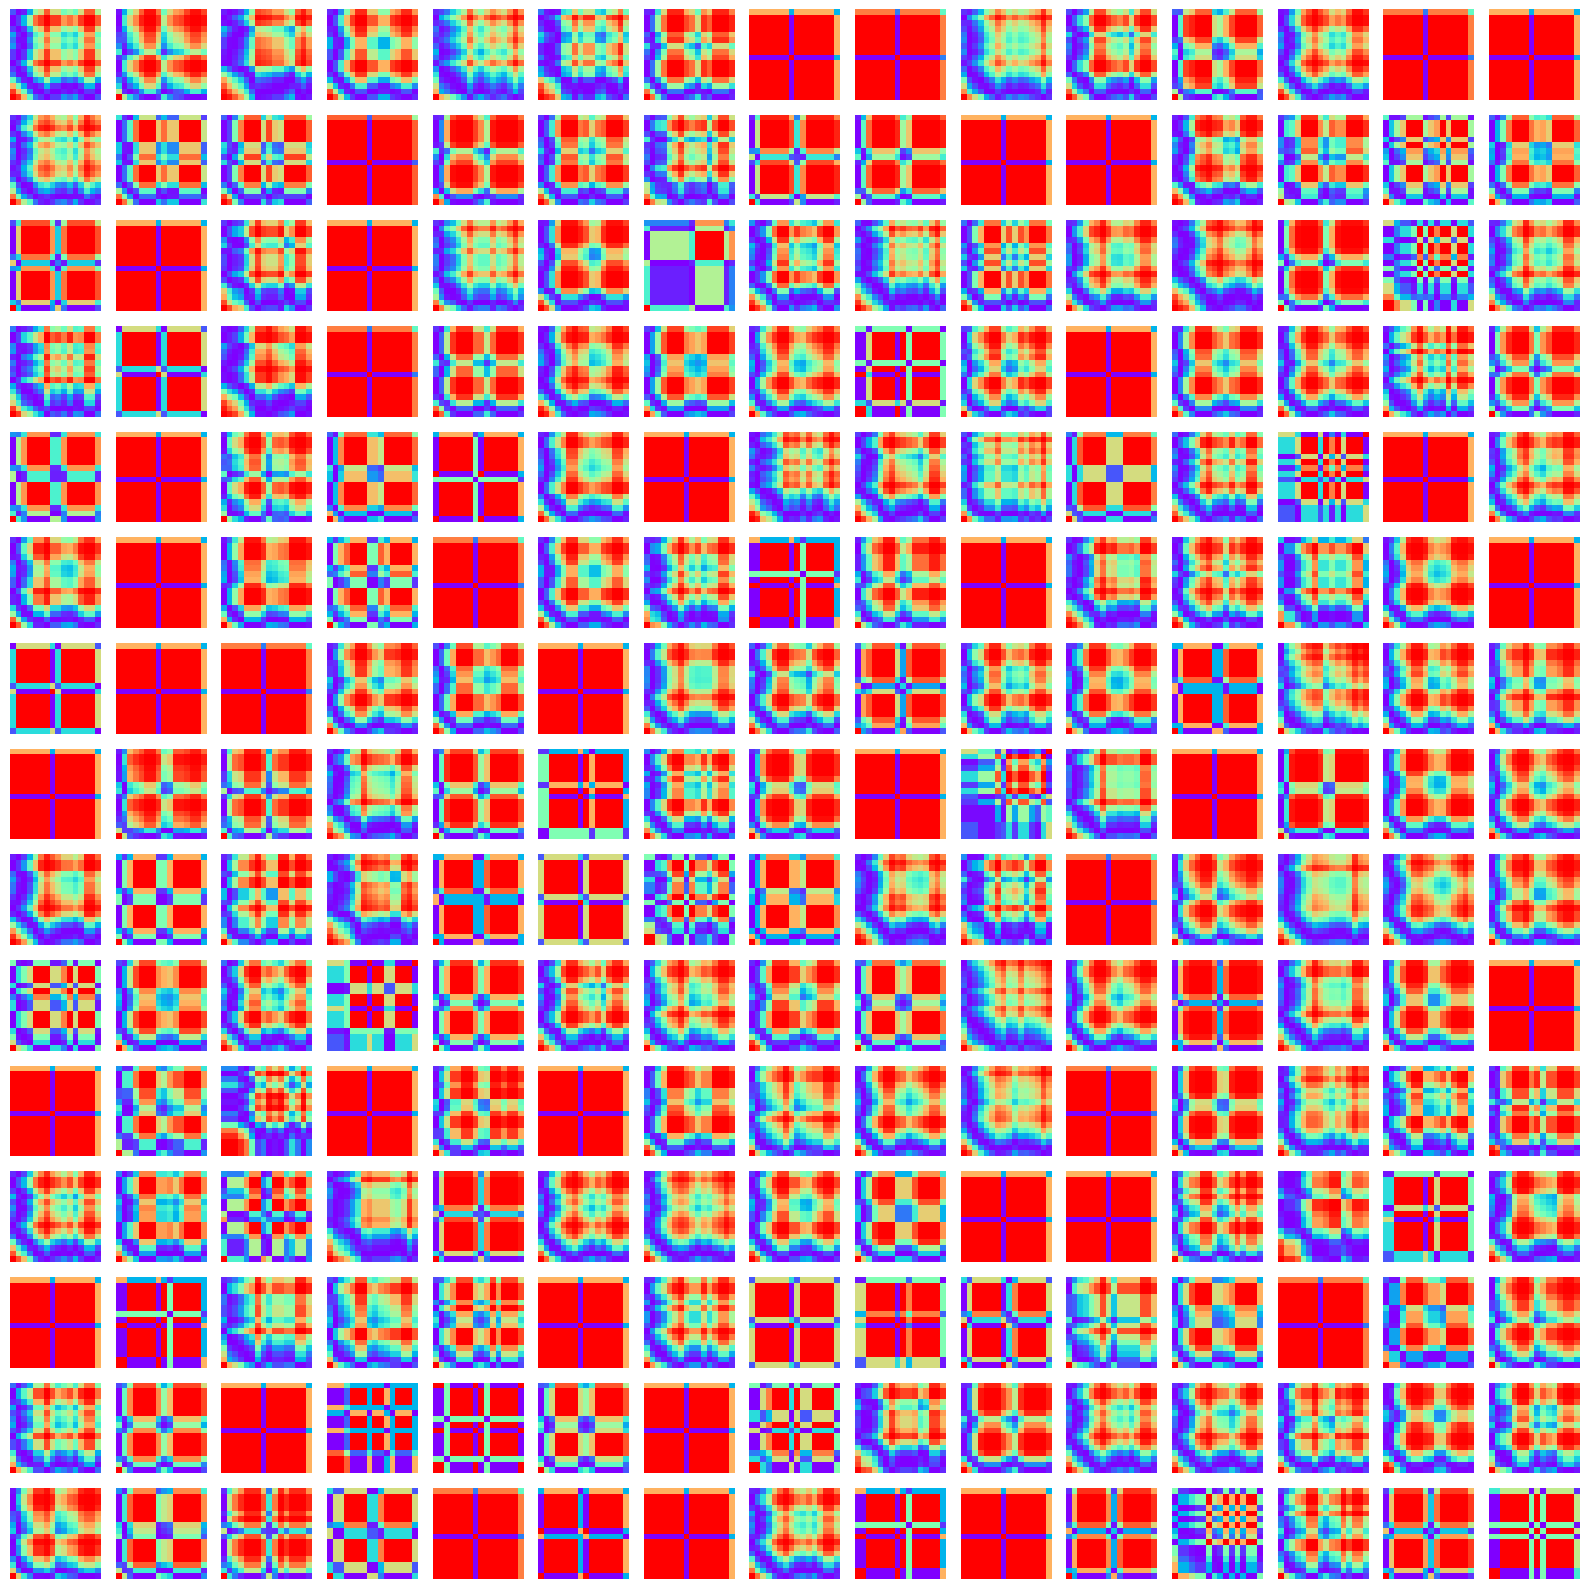

------------------------------------------------------------------------------------------------------
4 ----------------------------------------------------------------------------------------------------


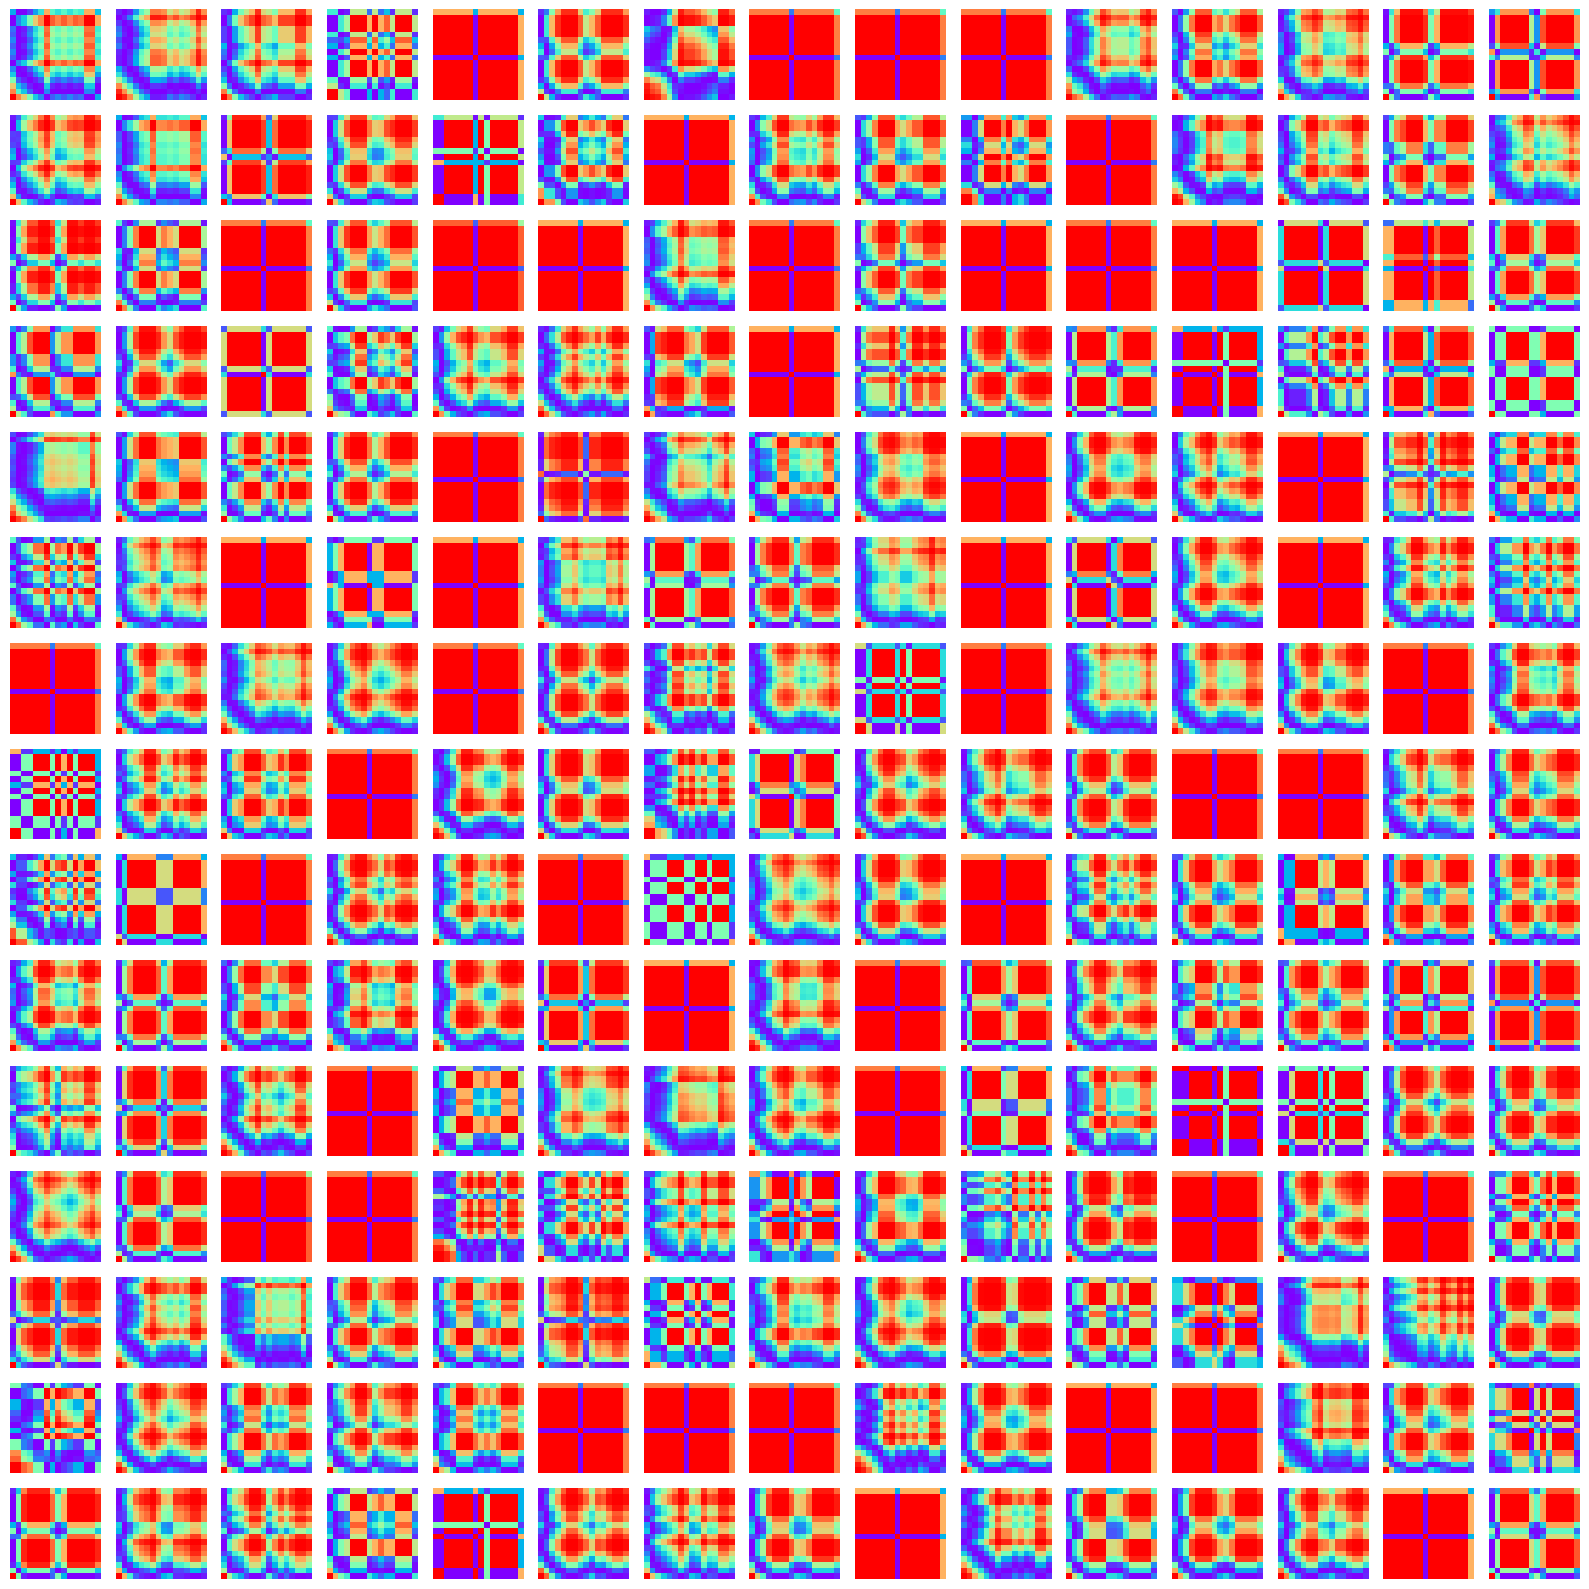

------------------------------------------------------------------------------------------------------
5 ----------------------------------------------------------------------------------------------------


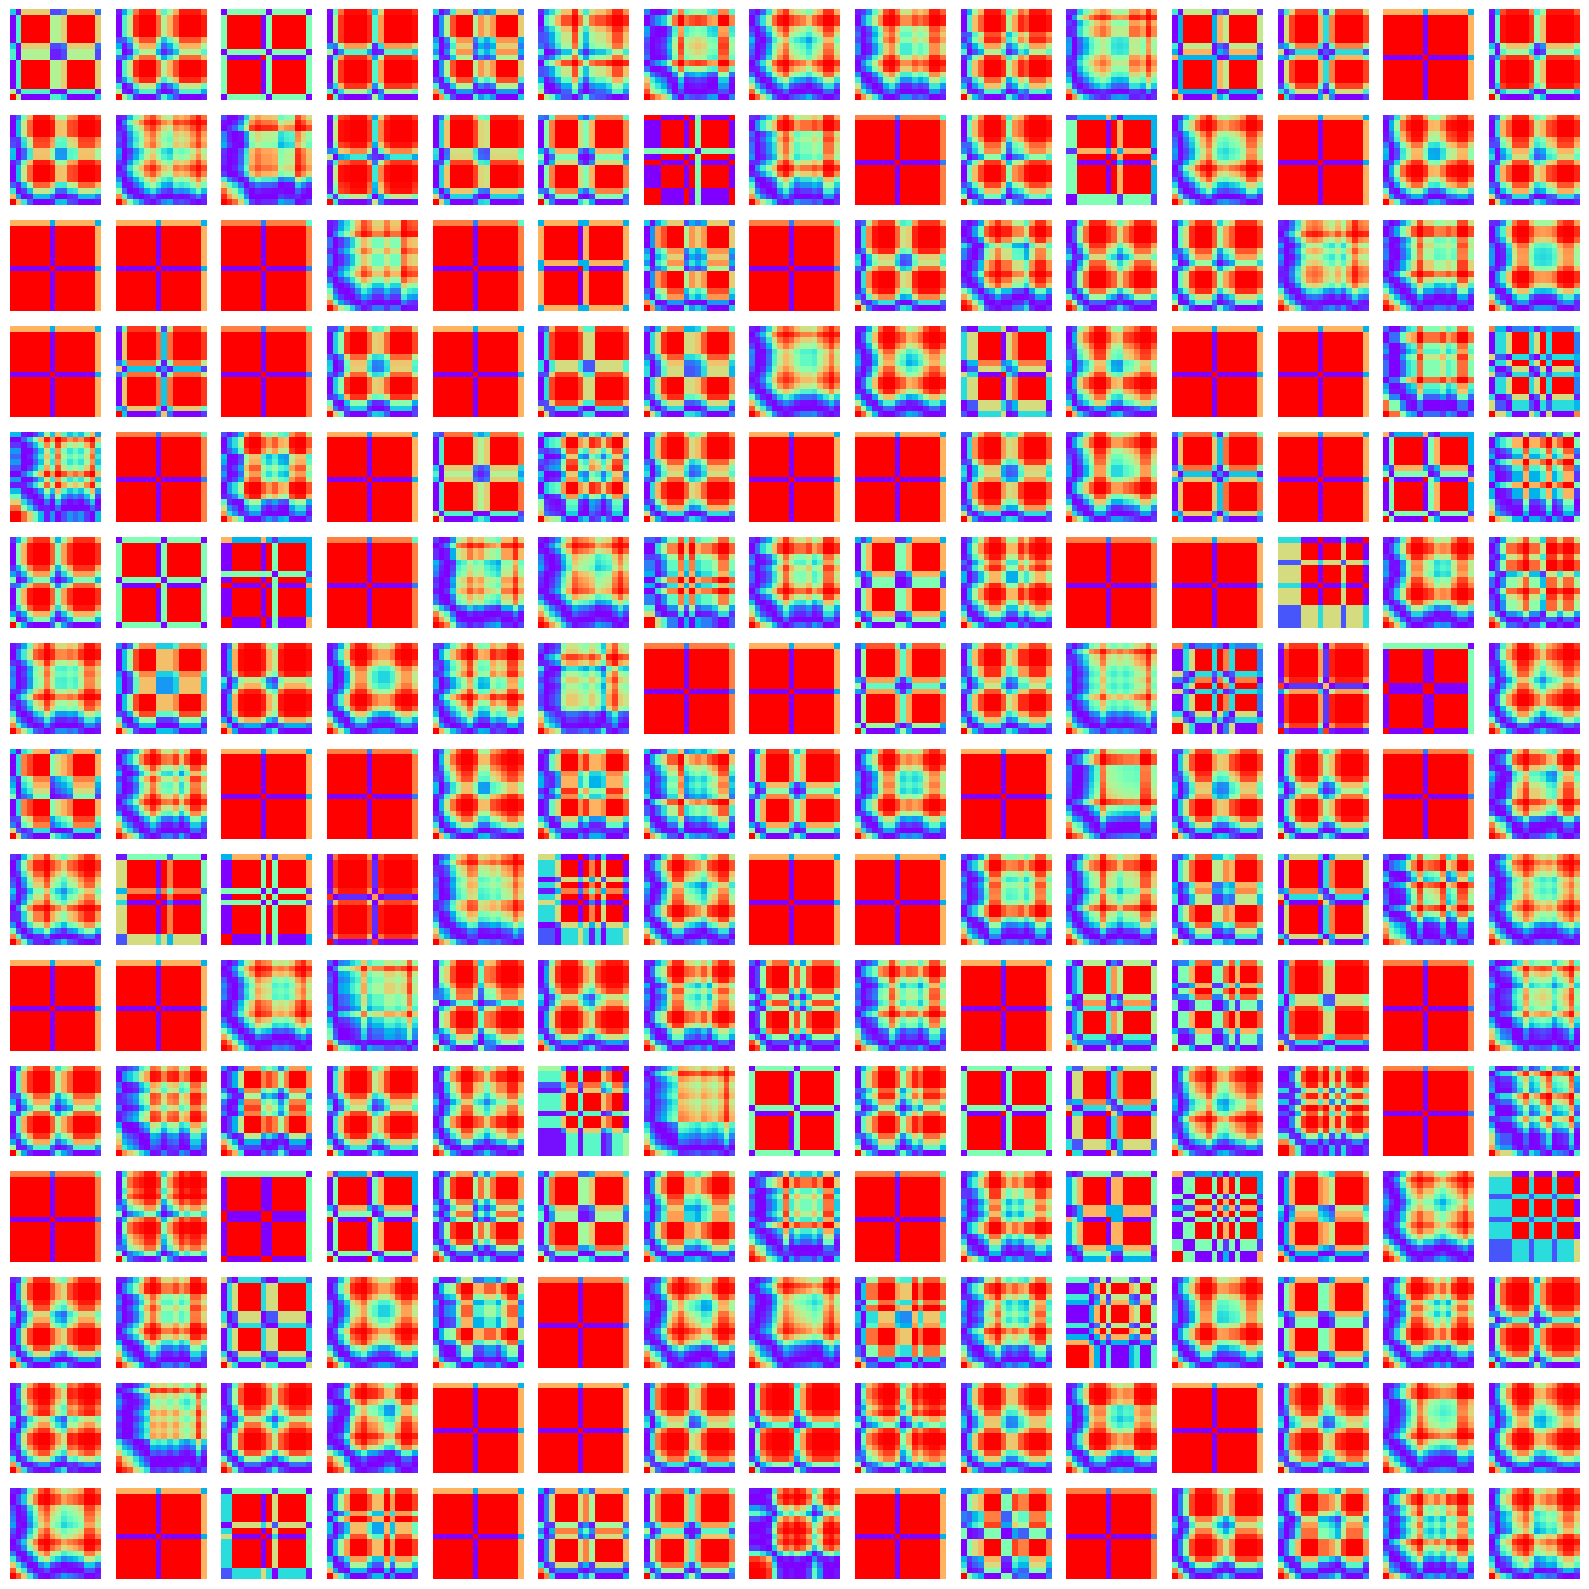

------------------------------------------------------------------------------------------------------
6 ----------------------------------------------------------------------------------------------------


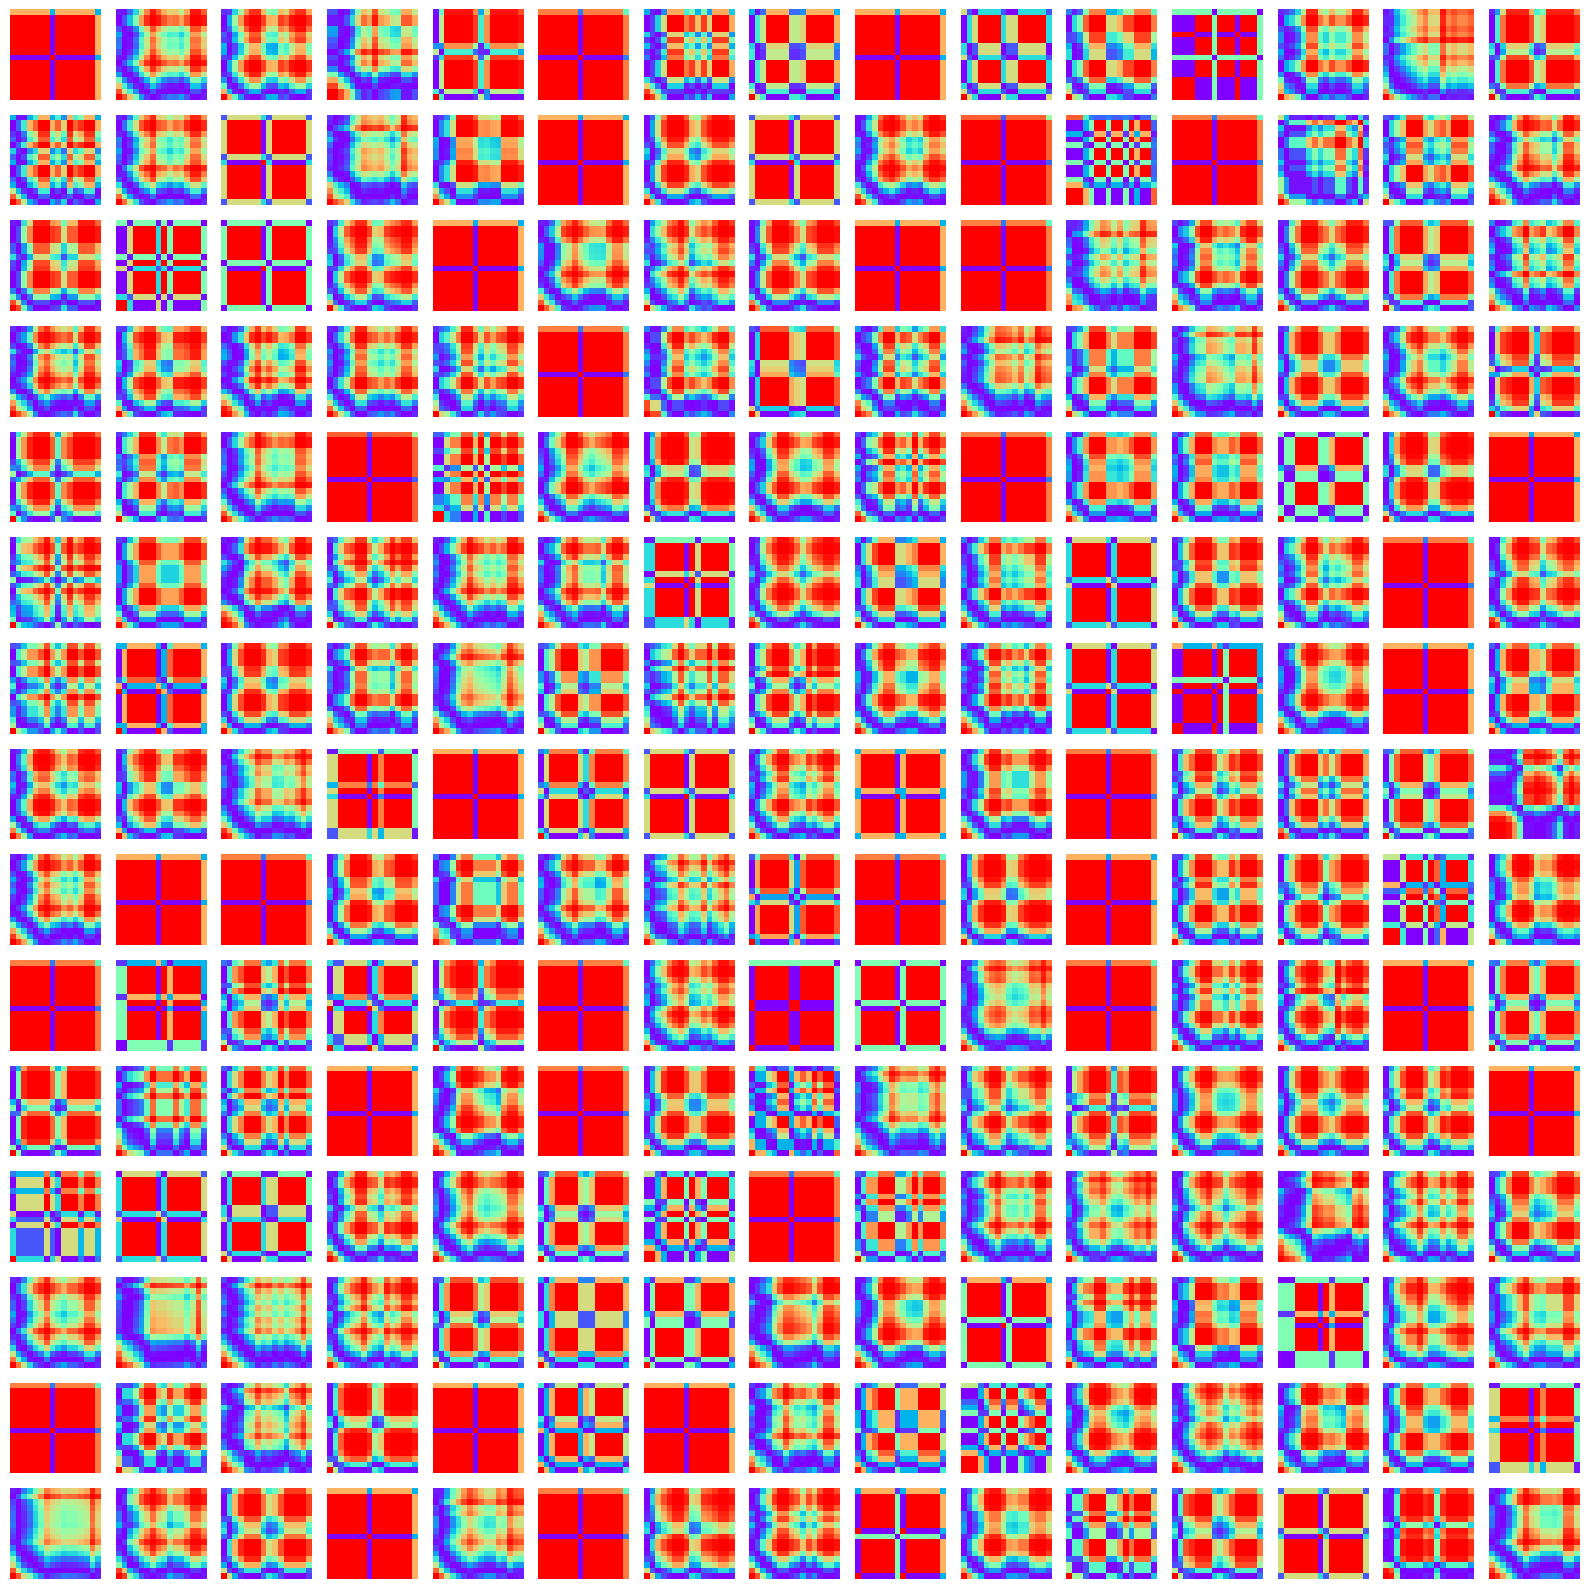

------------------------------------------------------------------------------------------------------
7 ----------------------------------------------------------------------------------------------------


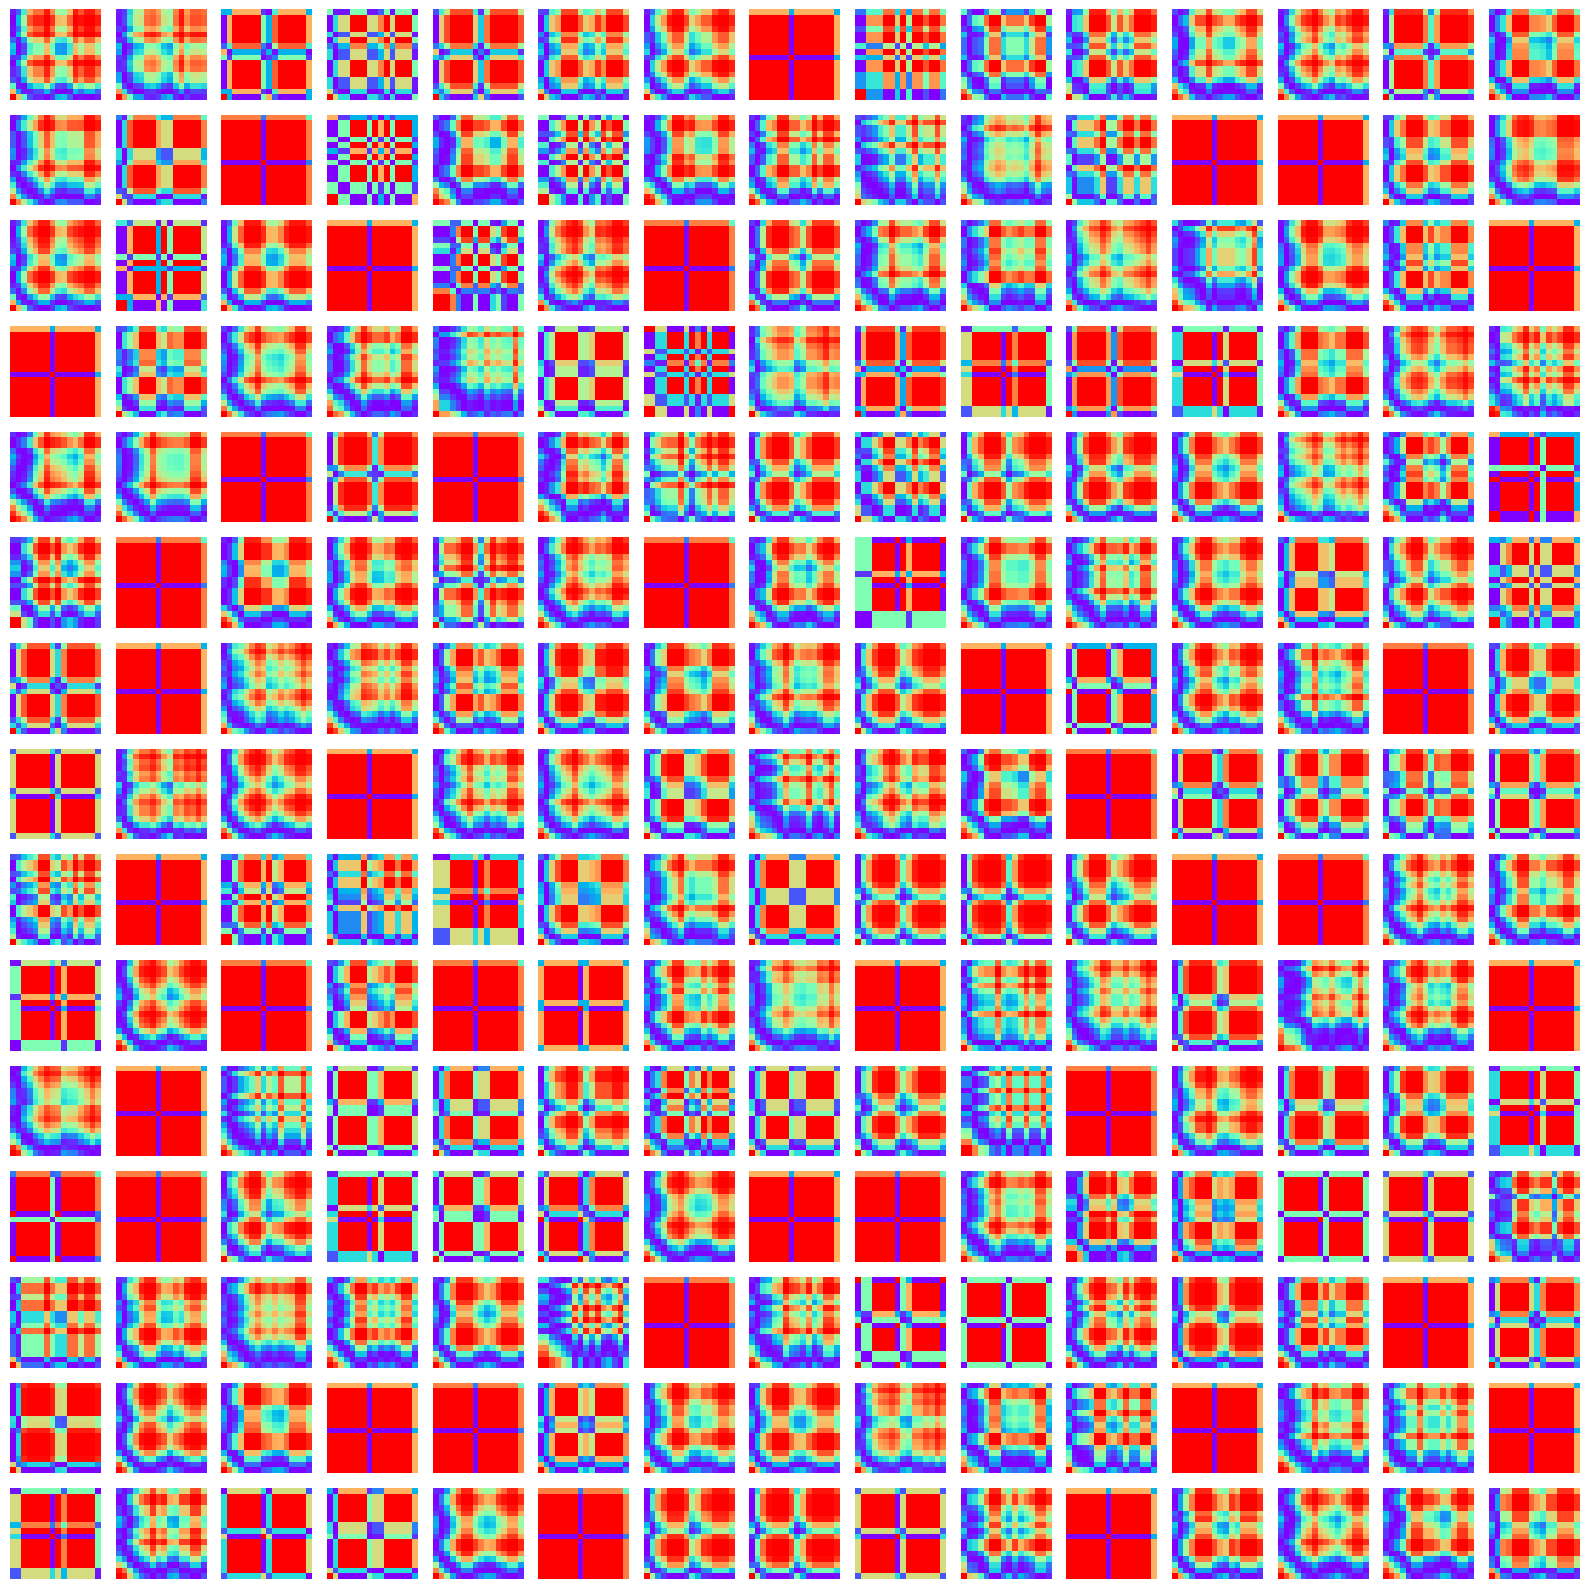

------------------------------------------------------------------------------------------------------
8 ----------------------------------------------------------------------------------------------------


KeyboardInterrupt: 

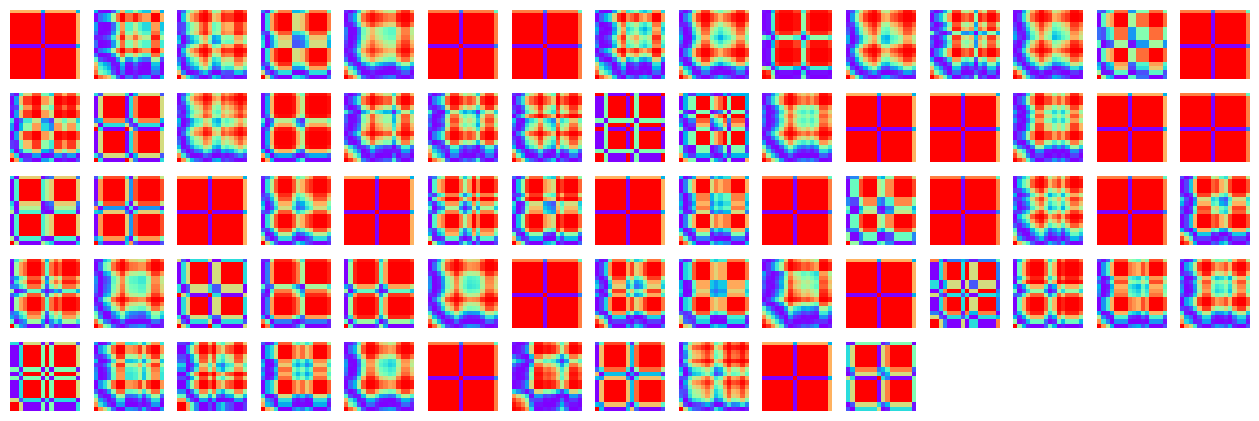

In [30]:
for i in range(0,10):
    print(i,'-'*100)
    idx = np.where(y_test == 0)[0]
    idx = np.random.choice(idx, size=225)
    temp = x_test_gaf[idx]

    plt.figure(figsize=(16,16))
    for i, val in enumerate(temp):
        plt.subplot(15,15,i+1)
        plt.imshow(val, cmap='rainbow', origin='lower')
        plt.axis('off')

    # 레이아웃 조정
    plt.tight_layout()
    plt.show()
    print('-'*102)

## MTF

In [11]:
mtf = MarkovTransitionField()
x_test_gaf = mtf.fit_transform(x_test)

In [12]:
categories = list(range(0,10))
statistics = {}

for category in categories:
    idx = np.where(y_test == category)[0]
    gaf_images = x_test_gaf[idx]
    
    # 평균과 표준편차 계산
    mean_gaf = np.mean(gaf_images, axis=0)
    std_gaf = np.std(gaf_images, axis=0)
    
    statistics[category] = (mean_gaf, std_gaf)

# 결과 출력
for category, (mean_gaf, std_gaf) in statistics.items():
    print(f"Category {category} - Mean: {np.mean(mean_gaf):.4f}, Std: {np.mean(std_gaf):.4f}")


Category 0 - Mean: 0.2529, Std: 0.2430
Category 1 - Mean: 0.1702, Std: 0.1948
Category 2 - Mean: 0.1638, Std: 0.1863
Category 3 - Mean: 0.1559, Std: 0.1793
Category 4 - Mean: 0.1555, Std: 0.1808
Category 5 - Mean: 0.1511, Std: 0.1746
Category 6 - Mean: 0.1468, Std: 0.1725
Category 7 - Mean: 0.1471, Std: 0.1745
Category 8 - Mean: 0.1436, Std: 0.1712
Category 9 - Mean: 0.1434, Std: 0.1731


In [39]:
categories = list(range(0,10))
statistics = {}

for category in categories:
    idx = np.where(y_test == category)[0]
    gaf_images = x_test_gaf[idx]
    
    # 평균과 표준편차 계산
    mean_gaf = np.mean(gaf_images, axis=0)
    std_gaf = np.std(gaf_images, axis=0)
    
    statistics[category] = (mean_gaf, std_gaf)

# 결과 출력
for category, (mean_gaf, std_gaf) in statistics.items():
    print(f"Category {category} - Mean: {np.mean(mean_gaf):.4f}, Std: {np.mean(std_gaf):.4f}")


Category 0 - Mean: 0.3775, Std: 0.3365
Category 1 - Mean: 0.2156, Std: 0.2364
Category 2 - Mean: 0.2079, Std: 0.2267
Category 3 - Mean: 0.1984, Std: 0.2135
Category 4 - Mean: 0.1983, Std: 0.2144
Category 5 - Mean: 0.1875, Std: 0.1983
Category 6 - Mean: 0.1787, Std: 0.1916
Category 7 - Mean: 0.1794, Std: 0.1920
Category 8 - Mean: 0.1680, Std: 0.1786
Category 9 - Mean: 0.1700, Std: 0.1873


0 ----------------------------------------------------------------------------------------------------


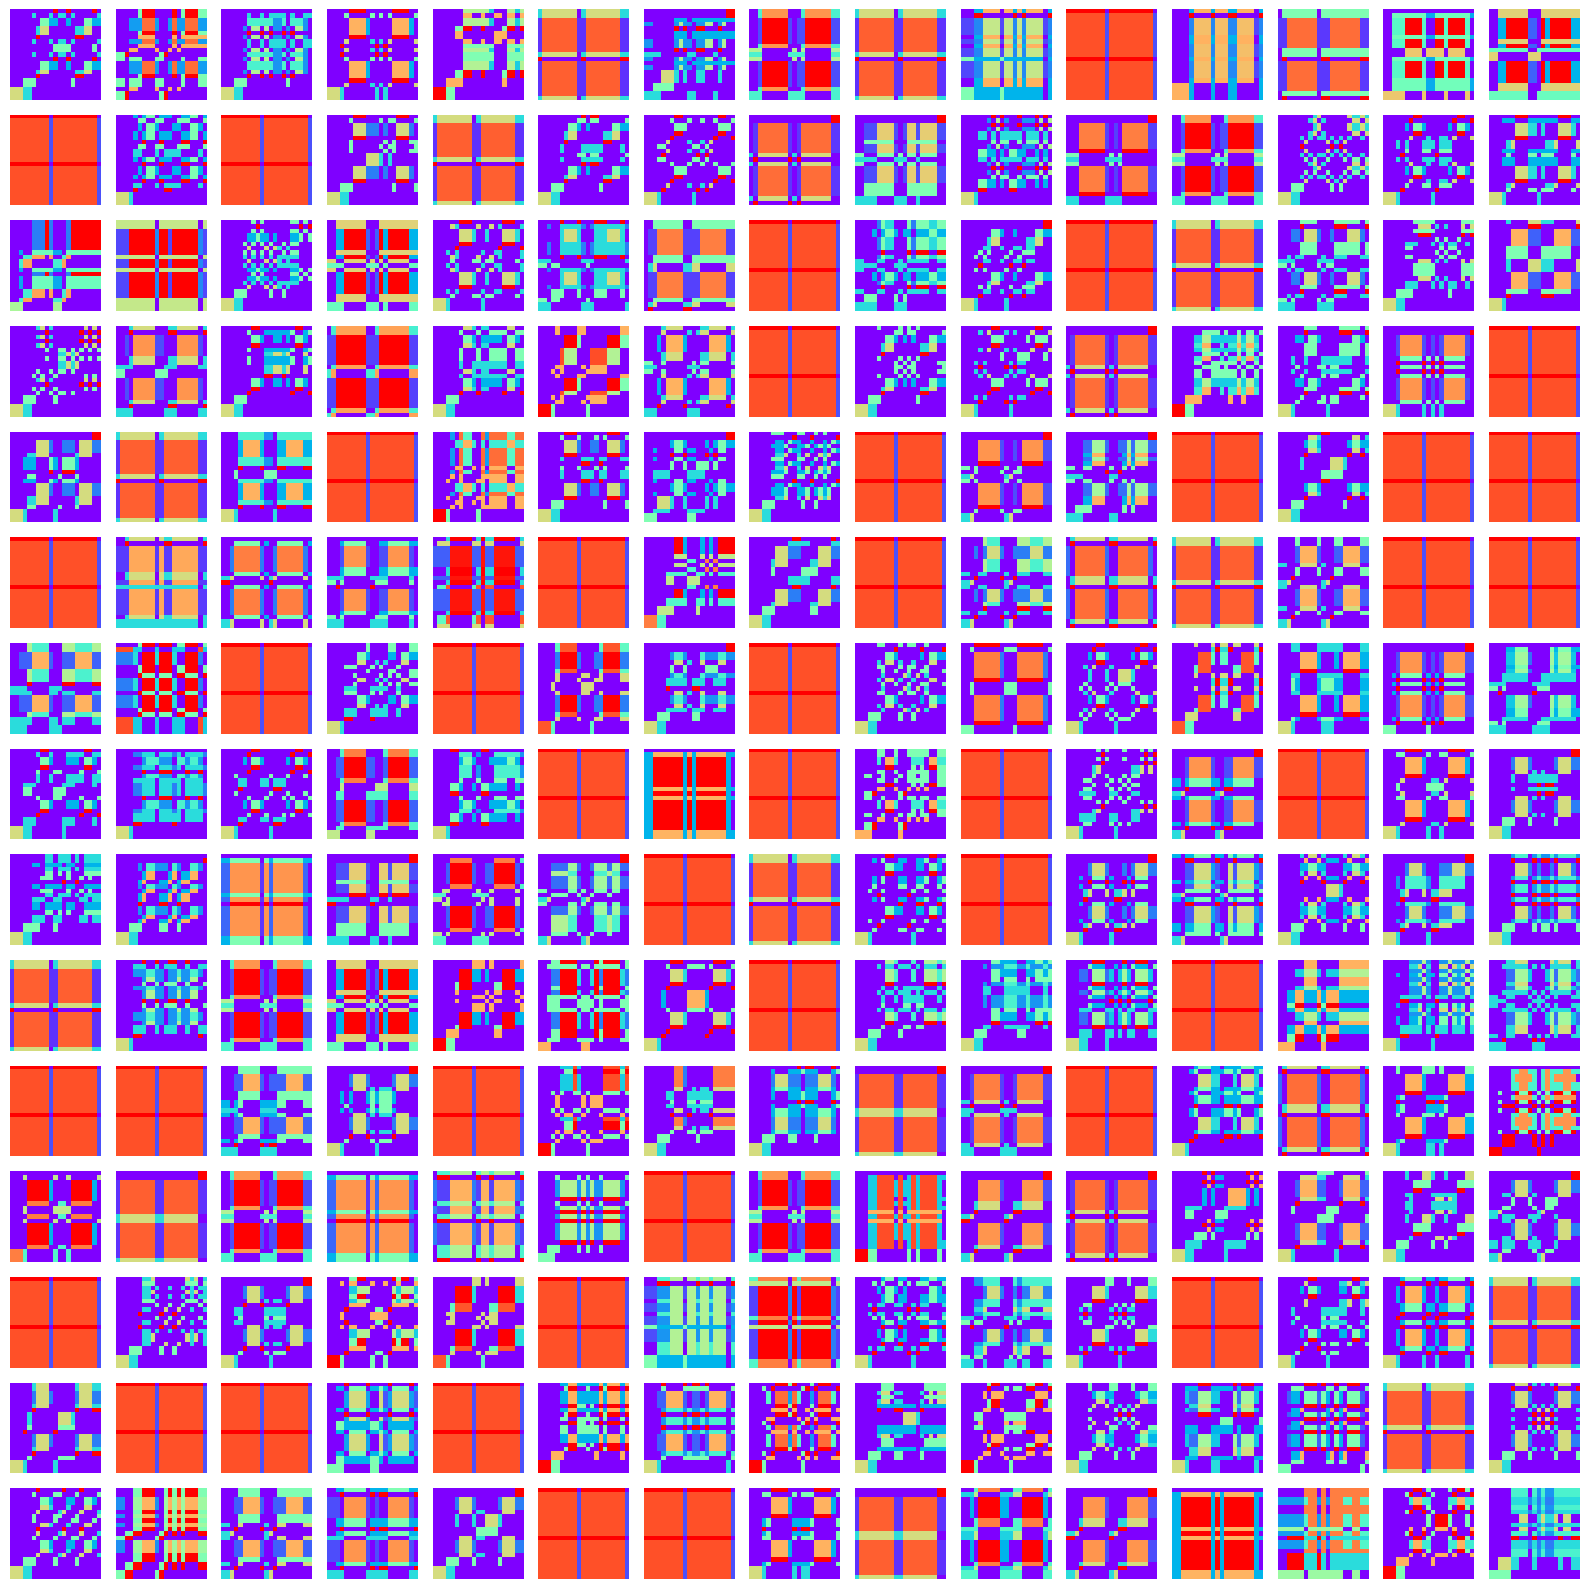

------------------------------------------------------------------------------------------------------
1 ----------------------------------------------------------------------------------------------------


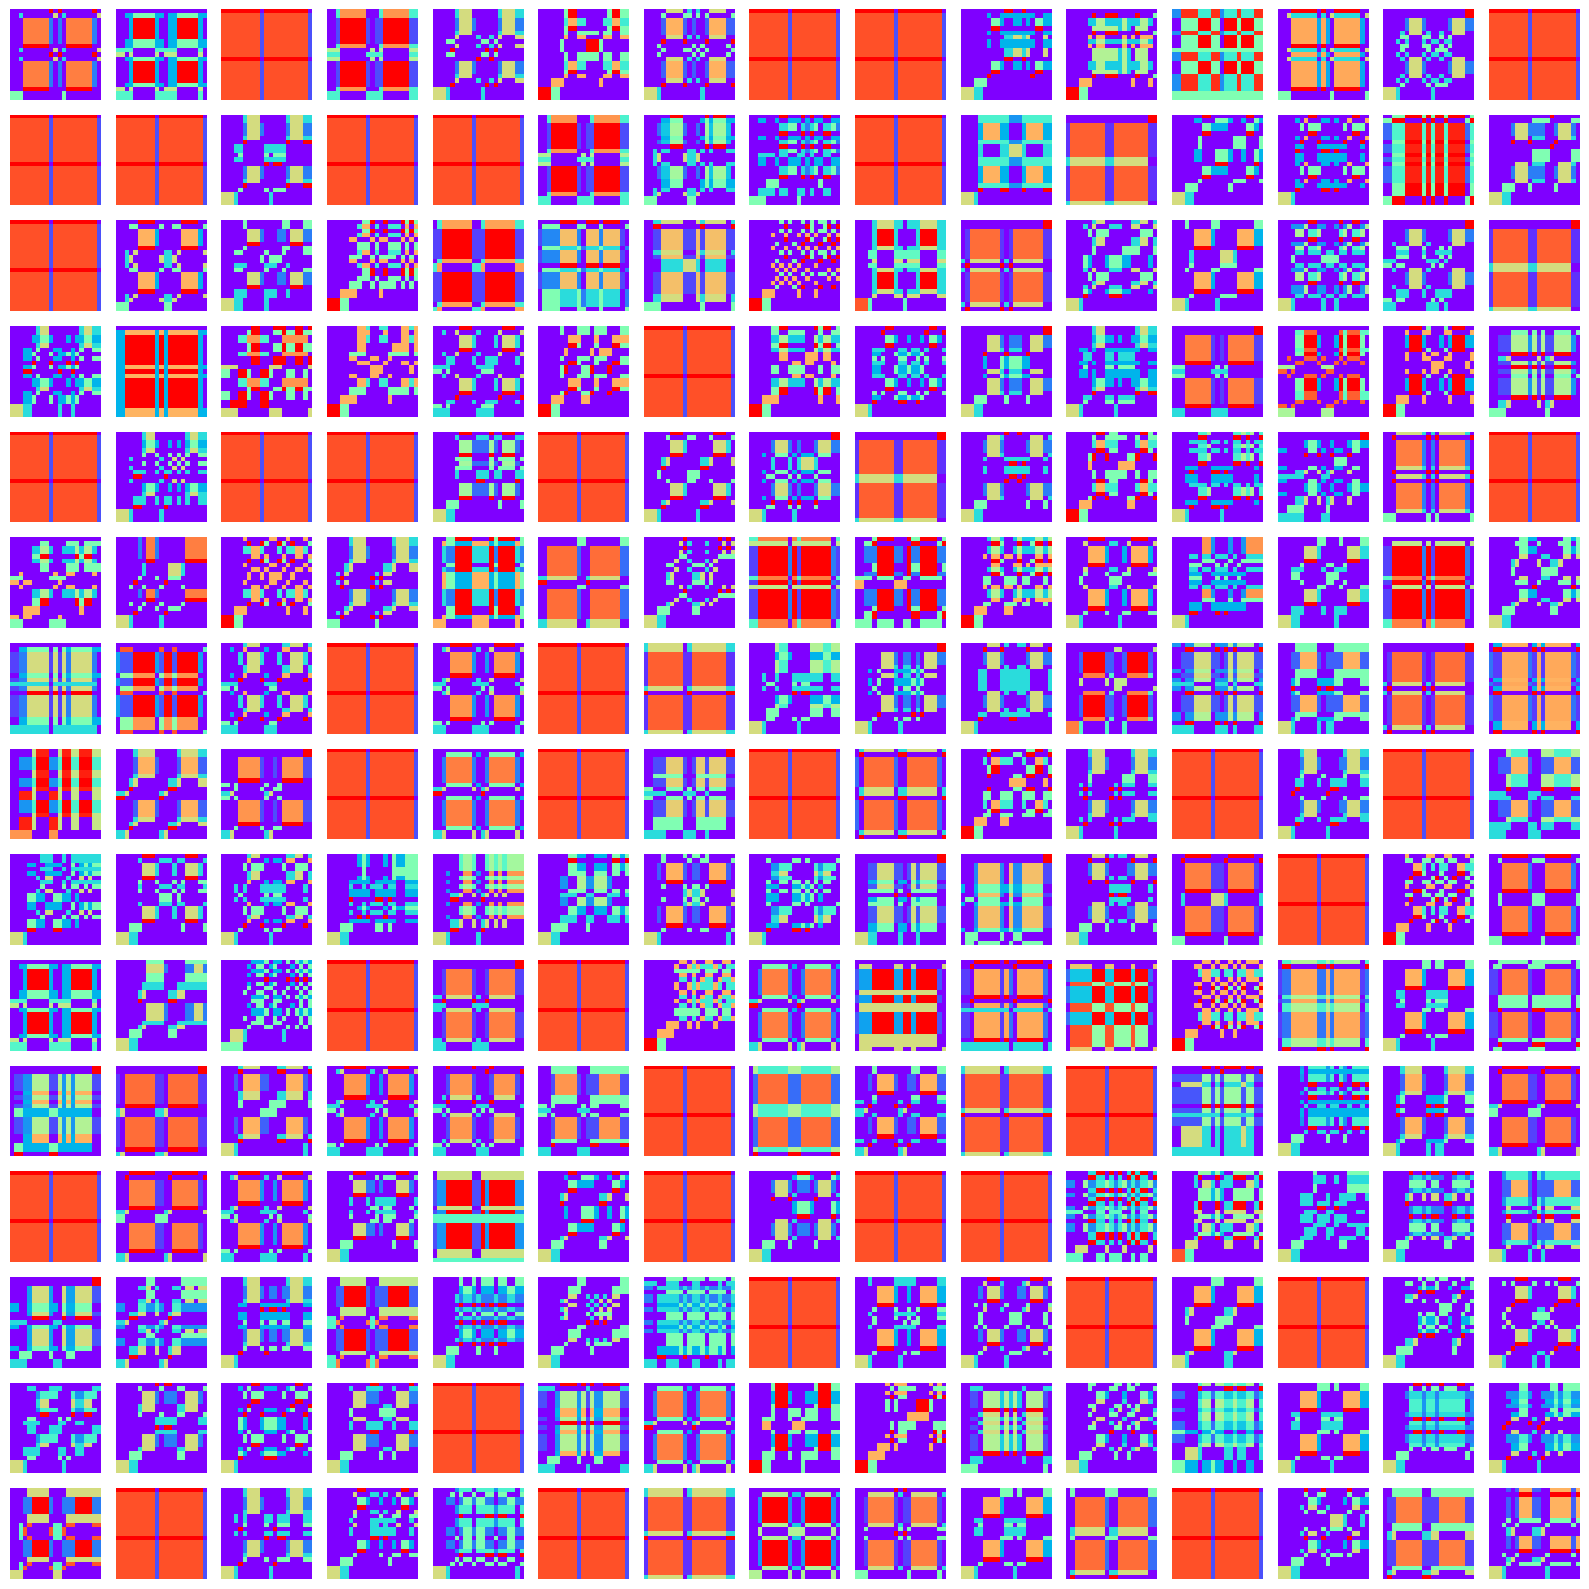

------------------------------------------------------------------------------------------------------
2 ----------------------------------------------------------------------------------------------------


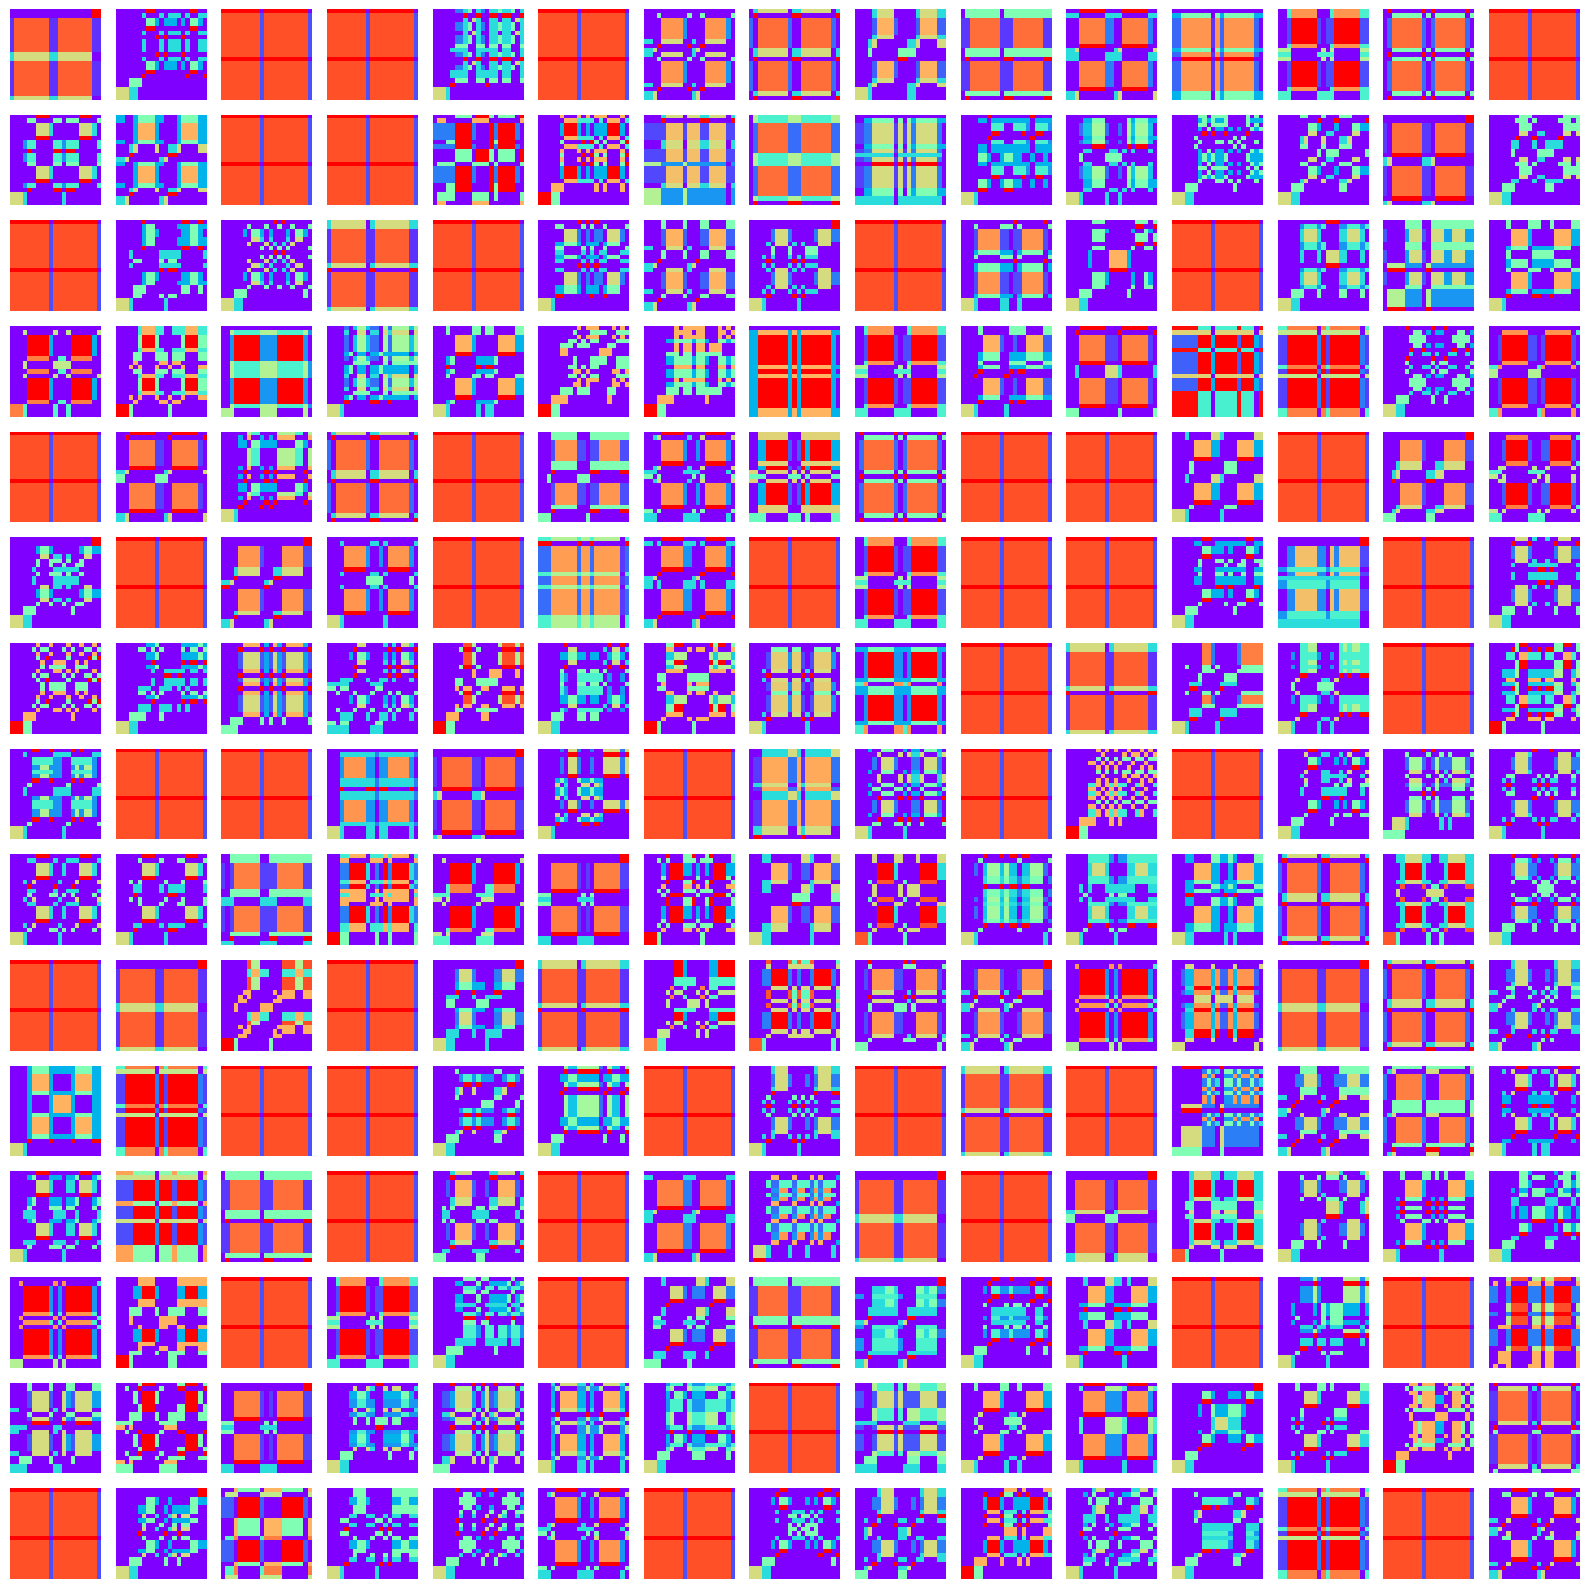

------------------------------------------------------------------------------------------------------
3 ----------------------------------------------------------------------------------------------------


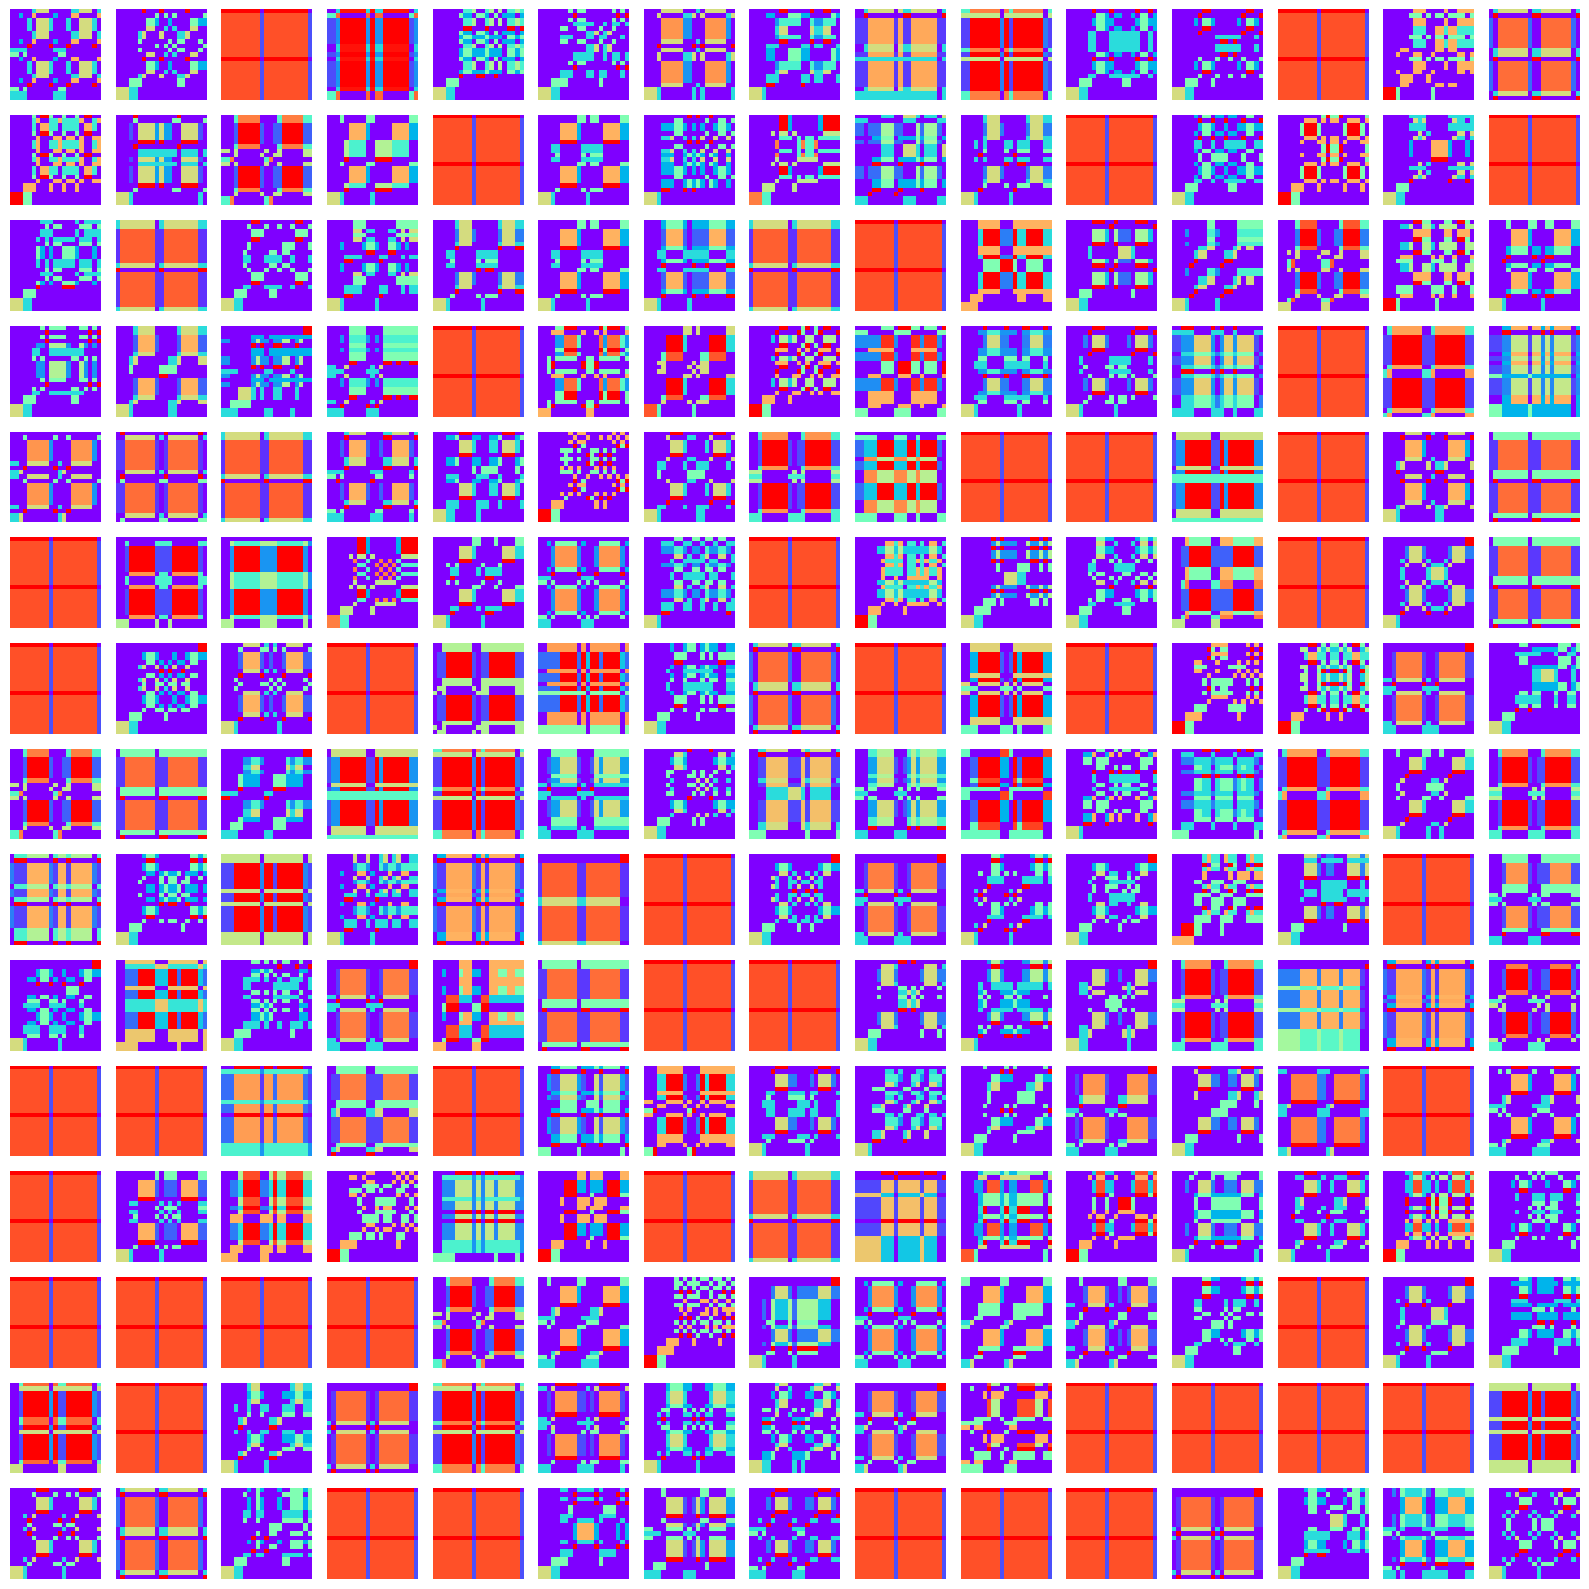

------------------------------------------------------------------------------------------------------
4 ----------------------------------------------------------------------------------------------------


KeyboardInterrupt: 

In [27]:
for i in range(0,10):
    print(i,'-'*100)
    idx = np.where(y_test == 0)[0]
    idx = np.random.choice(idx, size=225)
    temp = x_test_gaf[idx]

    plt.figure(figsize=(16,16))
    for i, val in enumerate(temp):
        plt.subplot(15,15,i+1)
        plt.imshow(val, cmap='rainbow', origin='lower')
        plt.axis('off')

    # 레이아웃 조정
    plt.tight_layout()
    plt.show()
    print('-'*102)

## Create IMG

In [ ]:
# 이미지 증식에 사용
from keras.preprocessing.image import ImageDataGenerator

# 이미지->배열 / 배열->이미지
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import img_to_array

# 이미지 읽어들이기
from keras.preprocessing.image import load_img

imgGen = ImageDataGenerator(rescale=1. / 255, #이미지 데이터를 0과 1사이로 변경(정규화)
                            rotation_range=15, #회전(15도를 기준으로 랜덤하게 회전함) #0~90사이값
                            width_shift_range=0.1, #수평이동(비율(10%)에 따라 랜덤하게 이동) #0~1사이값
                            height_shift_range=0.1, # 수직이동(비율(10%)에 따라 랜덤하게 이동) #0~1사이값
                            shear_range=0.5, #이미지 형태 변형(반시계 방향)
                            zoom_range=[0.8, 2.0], #확대/축소 #0.8~20 사이의 값으로 랜덤하게 변환
                            horizontal_flip=True, #수평방향 뒤집기
                            vertical_flip=True, #수직방향 뒤집기
                            fill_mode='nearest') #이미지 변형 시 발생하는 빈 공간 픽셀값 채우는 방식
                                                 #nearest:가까운 곳의 픽셀값으로 채우기
                                                 #reflect:빈공간만큼의 영역을 근처 공간의 반전된 이미지로 채우기
                                                 #wrap:빈 공간을 이동하면서 잘려나간 이미지로 채우기
                                                 #constant:빈 공간을 검정 또는 흰색으로 채우기

# 이미지 불러오기
img = load_img('./img/bori.jpg')

x = img_to_array(img)
x = x.reshape((1,) + x.shape) # 이미지 증식을 위해 4차원 데이터로 만들어야함

# 이미지 증식시키기
i = 0
cnt = 100  #생성할 이미지 개수
for batch in imgGen.flow(x,  #flow() : imgGen에서 랜덤하게 만들어진 이미지를 저장시키는 함수
                         save_to_dir='./img/new',
                         save_prefix='train',
                         save_format='png'):

    if i > cnt:
        break  #cnt만큼 반복
        
    i += 1
    
print('이미지 증식이 완료되었습니다')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 데이터 증강기 설정
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 클래스별로 데이터 증강
class_multiplier = {
    1: 50,
    2: 33,
    3: 38,
    4: 36,
    5: 28,
    6: 43,
    7: 50,
    8: 100,
    9: 100
}

augmented_images = []
augmented_labels = []

for class_label, multiplier in class_multiplier.items():
    class_indices = np.where(y == class_label)[0]
    class_images = x[class_indices]
    
    # 증강
    for _ in range(multiplier):
        for image in class_images:
            image = np.expand_dims(image, 0)
            for _ in range(1):  # 증강된 이미지 수를 원하는 만큼 설정 가능
                augmented_image = datagen.flow(image, batch_size=1)[0].astype('uint8')
                augmented_images.append(augmented_image[0])
                augmented_labels.append(class_label)

# 증강된 데이터를 numpy 배열로 변환
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# 기존 데이터와 결합
x_augmented = np.concatenate((x, augmented_images), axis=0)
y_augmented = np.concatenate((y, augmented_labels), axis=0)


## model

In [8]:
x_train_gaf4 = x_train_gaf.reshape(-1, 21, 21, 1)
x_val_gaf4= x_val_gaf.reshape(-1, 21, 21, 1)
x_test_gaf4= x_test_gaf.reshape(-1, 21, 21, 1)

In [ ]:
# 0610_18:00기준 best
clear_session()

model = Sequential([Rescaling(1/255, input_shape=x_train_gaf4.shape[1:]), # input_shape=(32, 32, 3)
                    Conv2D(64, kernel_size = 3, strides=(1,1), padding='same', activation='relu'),
                    MaxPooling2D(pool_size = 2 ),
                    Flatten(),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')])


model.summary()

# 모델 설정
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 학습
history = model.fit(x_train_gaf4, y_train, epochs = 10, validation_data=(x_val_gaf4, y_val), batch_size=80, class_weight=class_weights).history

# 예측
pred = model.predict(x_test_gaf4)
pred_1 = pred.argmax(axis=1)

cm = confusion_matrix(y_test, pred_1)
print(csi(cm))
print('-'*60)
print(cm)
print('-'*60)
print(classification_report(y_test, pred_1))

beepsound()